# Install detectron2

In [1]:
!pip install -U torch torchvision
!pip install git+https://github.com/facebookresearch/fvcore.git
import torch, torchvision
torch.__version__
!pip install -U 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'
!git clone https://github.com/facebookresearch/detectron2 detectron2_repo
!pip install -e detectron2_repo
!pip install numpy==1.17

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.5.0+cu101)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.6.0+cu101)
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-y_ip9912
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-y_ip9912
     |████████████████████████████████| 276kB 4.1MB/s 
  Created wheel for fvcore: filename=fvcore-0.1-cp36-none-any.whl size=44465 sha256=102ed1b4bfd189e4aab110e1f9f4e237c8b5578295f5b86baab8cbf9574e05c2
  Stored in directory: /tmp/pip-ephem-wheel-cache-x4rcu1f7/wheels/48/53/79/3c6485543a4455a0006f5db590ab9957622b6227011941de06
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp36-cp36m-linux_x86_64.whl size=44621 sha256=cdacd67f5c26962d20f51b511d9ada5373359c6f9fd7efa03e9c568dadf5fba2
  Stored in directory: /root/.cache/pip/wheels/a7/c1/ea/cf5bd31012e735dc1dfea3131a2d5eae7978b251083d6247bd
Successfully b

In [0]:
from google.colab import drive
import os
drive.mount('/content/drive')
from detectron2.utils.visualizer import ColorMode
from detectron2.engine import DefaultTrainer
from detectron2.config import get_cfg
import os
from detectron2.data.datasets import register_coco_instances
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import json
import numpy as np
# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.data import MetadataCatalog, DatasetCatalog
train = "pets_train"
image_root = "/content/drive/My Drive/VietAnh/dataset/image"
instances_json = "/content/drive/My Drive/VietAnh/dataset/annotations/data_seg_merged/train_pets.json"
instances_test_json = "/content/drive/My Drive/VietAnh/dataset/annotations/data_seg_merged/test_pets.json"
test = "pets_test"

In [0]:
# register dataset 
register_coco_instances(train, {}, instances_json, image_root)
register_coco_instances(test, {}, instances_test_json, image_root)

In [2]:
# set config
cfg = get_cfg()
cfg.merge_from_file("/content/detectron2_repo/configs/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")
cfg.DATASETS.TRAIN = (train,)
cfg.DATASETS.TEST = (test, )   # no metrics implemented for this dataset
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2 # 3 classes (data, fig, hazelnut)
cfg.OUTPUT_DIR = "/content/drive/My Drive/VietAnh/weights"
cfg.INPUT.MASK_FORMAT = 'bitmask'
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.2
cfg.MODEL.RETINANET.NMS_THRESH_TEST = 0.2
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.8
cfg.MODEL.RPN.POST_NMS_TOPK_TEST = 100
cfg.TEST.DETECTIONS_PER_IMAGE = 10

# load trained weights 
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(True)

predictor = DefaultPredictor(cfg)
meta_test = MetadataCatalog.get(test)
dicts_test = DatasetCatalog.get(test)
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader
evaluator = COCOEvaluator(test, cfg, False, output_dir="./output/")
test_loader = build_detection_test_loader(cfg, test)
inference_on_dataset(trainer.model, test_loader, evaluator)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[05/10 04:04:01 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), strid

OrderedDict([('bbox',
              {'AP': 53.73262470926456,
               'AP-cat': 60.58472350025035,
               'AP-dog': 46.88052591827877,
               'AP50': 94.69874817572581,
               'AP75': 53.91497242611355,
               'APl': 53.73262470926456,
               'APm': nan,
               'APs': nan}),
             ('segm',
              {'AP': 69.12588914956093,
               'AP-cat': 67.7416559669871,
               'AP-dog': 70.51012233213477,
               'AP50': 96.75470733938441,
               'AP75': 83.7290259091409,
               'APl': 69.169772428465,
               'APm': nan,
               'APs': nan})])

# Visualize results

WARNING [05/10 04:12:47 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[05/10 04:12:47 d2.data.datasets.coco]: Loaded 734 images in COCO format from /content/drive/My Drive/VietAnh/dataset/annotations/data_seg_merged/test_pets.json
{'file_name': '/content/drive/My Drive/VietAnh/dataset/image/newfoundland_117.jpg', 'height': 375, 'width': 500, 'image_id': 552, 'annotations': [{'iscrowd': 0, 'bbox': [9, 58, 419, 316], 'category_id': 1, 'segmentation': {'size': [375, 500], 'counts': 'Te32d;1O1O10000O100O100O100O1O1L4M3O1O1N2N2O1O1O1N2O1O1O1O1O1O1O1O1O1O1O1O1O1O1O1M3M3ZNf1L4I7M3O1O1@[LkHh3P7`LlHa3Q7cLlH_3Q7eLmH\\3R7e0N2N2O1N2N2O1M3M3M3M3M3OfMjIUOT6k0TJoNk5Q1WJnNh5S1YJlNf5V1[JhNd5[1\\JcNc5_1^J_Na5c1`J[N_5g1cJVN\\5l1iJnMV5T2mJhMR5Z2QKbMn4`2WKZMh4g2`KQM_4Q3]JRNb5R4O1O1O1O100O100O100O100O1O100O1O1O100O1O100O1O1O1O1O1O100O1O100O1O1O100O1O1O1O1SOm0L4M3M3O1M3O1N2O1N2N2N2O1N2M3O1N2O1O1O1O1O1O1O100O100O1O100O10000O100O10000O10000O10

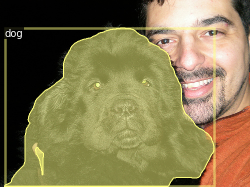

{'file_name': '/content/drive/My Drive/VietAnh/dataset/image/english_cocker_spaniel_16.jpg', 'height': 500, 'width': 375, 'image_id': 677, 'annotations': [{'iscrowd': 0, 'bbox': [17, 101, 357, 314], 'category_id': 1, 'segmentation': {'size': [500, 375], 'counts': 'Q_85\\?6L3M4K3N3M2N3N1N3M2O1M3N2N2N2O2M2N2N2N1O2M3N2N2N2N101N1O1O2N1O1O100O1O1O1O001N2N1N3O000O2O0N2N200N111O1O1O1O010O10O010OUFZMi6g2TI_Mi6`2VIdMh6\\2WIfMg6Z2YIhMf6W2ZIkMe6T2\\ImMc6S2\\IoMb6R2^InMb6S2]InMb6R2]IPNb6P2^IQNa6e2hH\\MW7h2fHYMY7i2eHXMZ7k2bHWM]7j2bHVM^7k2`HWM_7j2_HWMa7j2^HVMb7k2bGQN]8P2_GSNa8m1^GTNb8m1\\GUNc8l1[GUNe8]41O0000000000001N10001O1N101O0O1O2O0O101O1N2N2N2M3N1O2M3M2N2M4N101N2N2N101O1N2O1N2N10001O00001O00001O0O101O1N101N2O001N2O1N2N2N2N2M3L4N2M3M3O010O1O1O1O00001O1O001O0010O01O001O01O01O01O001O01O01O0001O00gD_L_:a3^EfL_:Y3YERMe:P4O1O0O101O0001O00O101O0001O00O100O1N2O1O2fFTKg7n4UHYKg7h4WH\\Kg7d4WH`Kf7b4WHbKf7_4XHcKg7_4VHeKg7\\4XHeKg7\\4XHeKg7\\4WHfKi7Y4WHhKh7Y4WHhKh7Y4WHhKi7X4VHiKi7X4VHiKi7X4UHjKj7X4THiKk7X4

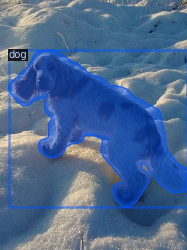

{'file_name': '/content/drive/My Drive/VietAnh/dataset/image/Russian_Blue_135.jpg', 'height': 421, 'width': 500, 'image_id': 241, 'annotations': [{'iscrowd': 0, 'bbox': [214, 79, 285, 341], 'category_id': 0, 'segmentation': {'size': [421, 500], 'counts': ']Th27k<8G8I9_EQO_8^1PG@S8e0iGAP8j0fGZOc6nNmIm1\\OXO`6SOoIi1\\OZO_6JYIQ14XO`6b2[IcMa6d4L4M3L3N2N1N5L7I4M;D?A6K2N1O1O1O002N001O000000O10001O0000000O2N3N0O3M1OXLSHY2o7_MVHb2V91O001O00001O0000001O0000000000000000000000000000000000000000O1000000O1000000O1000000O1O1O1O1O1O0000N21O6J1O1O1O10000O100000000000000001bG_MV6a2gIeMV6[2fIkMX6V2dInM[6S2bIQN\\6P2bIRN]6o1`ITN_6m1_IUN`6m1\\IVNc6k1YIYNf6i1TI\\Nk6g1hHcNX7f3O1O1O1O1O1O1O1O1O2N1O1O1O1O1O1O001O001O1O1O1O00001O001O00001O00001O001O0000001O00001O00001O001O00001O1O001O001O1O1O1O1O1O000000001O00001O1O00001O001O1O000000001O000000001O00001O1O1O1O00001O00001O1O001O00001O001O001O00001O00001O001O1O1O1O1O1O1O1O1O001O1O1O1O1O1O1O001O1O1O1O1O1O1O2N001O1O1O1O1O3M1O1O2N1O2N1O1O1O2N2N'}, 'bbox_mode': <BoxMo

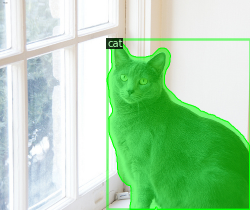

In [6]:
import random
from detectron2.utils.visualizer import Visualizer
import cv2
from google.colab.patches import cv2_imshow
meta_train = MetadataCatalog.get(test)
dicts_train = DatasetCatalog.get(test)
for d in random.sample(dicts_train, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=meta_train, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])